In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

### CHECKING DATA

In [3]:
with open("../dataset/data.csv", "r") as datafile:
    data = pd.read_csv(datafile)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
print(data["CustomerID"].value_counts().sort_index())

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: count, Length: 4372, dtype: int64


In [7]:
print(type(data["InvoiceNo"].value_counts()))

<class 'pandas.core.series.Series'>


In [8]:
data_list = list(data["InvoiceNo"].value_counts())
data_l = []
for x in data_list:
    if x < 10:
        data_l.append(x)

len(data_l)

12733

In [9]:
unique_dates_per_customer = data.groupby('CustomerID')[['InvoiceDate', 'Quantity']].nunique()
unique_dates_per_customer

,InvoiceDate,Quantity
CustomerID,,
12346.0,2,2
12347.0,7,15
12348.0,4,10
12349.0,1,12
12350.0,1,5
...,...,...
18280.0,1,5
18281.0,1,4
18282.0,3,9


In [10]:
countries_per_customer = data.groupby('Country')[['CustomerID', 'InvoiceDate']].nunique()
countries_per_customer.reset_index()

,Country,CustomerID,InvoiceDate
0,Australia,9,66
1,Austria,11,19
2,Bahrain,2,4
3,Belgium,25,119
4,Brazil,1,1
5,Canada,4,6
6,Channel Islands,9,33
7,Cyprus,8,20
8,Czech Republic,1,5
9,Denmark,9,21


In [11]:
dateCount = unique_dates_per_customer['InvoiceDate']
amount = unique_dates_per_customer['Quantity']
count = 0

for _, x in unique_dates_per_customer.iterrows():
    if x['InvoiceDate'] == 1 and x['Quantity'] <= 3:
        count += 1
count

302

In [12]:
data["CustomerID"].nunique()

4372

In [13]:
unique_dates_per_customer = data.groupby('CustomerID')[['Description']].count()
unique_dates_per_customer

,Description
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


In [14]:
counts = data.groupby('CustomerID').agg(
    total_descriptions=('Description', 'count'),
    unique_descriptions=('Description', 'nunique')
).reset_index()
counts

,CustomerID,total_descriptions,unique_descriptions
0,12346.0,2,1
1,12347.0,182,103
2,12348.0,31,22
3,12349.0,73,73
4,12350.0,17,17
...,...,...,...
4367,18280.0,10,10
4368,18281.0,7,7
4369,18282.0,13,12
4370,18283.0,756,272


In [15]:
negative = data["Quantity"]
num_negative = 0
for item in negative:
    if item < 0:
        num_negative += 1

num_negative

10624

In [16]:
df_negative = data[data["Quantity"] < 0]
df_negative

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [17]:
df_negative_data = data.loc[data["Quantity"] < 0, "CustomerID"]
df_negative_data

141       14527.0
154       15311.0
235       17548.0
236       17548.0
237       17548.0
           ...   
540449    14397.0
541541    15498.0
541715    15311.0
541716    17315.0
541717    17315.0
Name: CustomerID, Length: 10624, dtype: float64

In [18]:
df_negative_data = (
    df_negative.groupby("CustomerID")["Quantity"]
    .nunique()
    .reset_index(name="unique_negative_count")
)

df_negative_data

,CustomerID,unique_negative_count
0,12346.0,1
1,12352.0,4
2,12359.0,2
3,12362.0,4
4,12365.0,1
...,...,...
1584,18272.0,2
1585,18274.0,6
1586,18276.0,1
1587,18277.0,1


In [19]:
negative_counts = df_negative.groupby('CustomerID').agg(
    total_descriptions=('Description', 'count'),
    total_quantity=('Quantity', 'count'),
    unique_descriptions=('Description', 'nunique'),
    unique_invoice=('InvoiceNo', 'nunique'),
    unique_date=('InvoiceDate', 'nunique')
    
).reset_index()
negative_counts

,CustomerID,total_descriptions,total_quantity,unique_descriptions,unique_invoice,unique_date
0,12346.0,1,1,1,1,1
1,12352.0,10,10,8,3,3
2,12359.0,6,6,6,2,2
3,12362.0,8,8,8,3,3
4,12365.0,1,1,1,1,1
...,...,...,...,...,...,...
1584,18272.0,4,4,4,1,1
1585,18274.0,11,11,11,1,1
1586,18276.0,2,2,1,2,2
1587,18277.0,1,1,1,1,1


In [20]:
#  as we can see we have 1589 of orders are returned. not really that just number of customers only. all returned values are 10624.

In [21]:
# Step 1: Identify returns and their original purchases
# -----------------------------------------------------
df = data

# Step 1: Create unique transaction ID for matching purchases/returns
df['TransactionID'] = (df['CustomerID'].astype(str) + '_' + 
                       df['StockCode'] + '_' + 
                       df['UnitPrice'].round(2).astype(str) + '_' + 
                       df['Quantity'].abs().astype(str))

# Step 2: Add returned flag (1 for returns, 0 for purchases)
df['returned'] = 0

# Step 3: Identify matching purchases for returns
return_mask = df['Quantity'] < 0
return_keys = df.loc[return_mask, 'TransactionID']

# Step 4: Mark original purchases that were returned
df.loc[df['TransactionID'].isin(return_keys) & (df['Quantity'] > 0), 'returned'] = 1

# Step 5: Remove return rows (negative quantities)
clean_df = df[df['Quantity'] >= 0].copy()

# Optional: Add customer return statistics
customer_returns = clean_df.groupby('CustomerID')['returned'].agg(
    total_returns='sum',
    return_rate='mean'
).reset_index()

clean_df = clean_df.merge(customer_returns, on='CustomerID', how='left')

# Cleanup
clean_df.drop('TransactionID', axis=1, inplace=True)

# Verify results
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(clean_df)}")
print(f"Marked returns: {clean_df['returned'].sum()}")
print(clean_df[['InvoiceNo', 'StockCode', 'Quantity', 'returned']].head())

Original rows: 541909
Cleaned rows: 531285
Marked returns: 5714
  InvoiceNo StockCode  Quantity  returned
0    536365    85123A         6         0
1    536365     71053         6         0
2    536365    84406B         8         0
3    536365    84029G         6         0
4    536365    84029E         6         0


In [22]:
one = 0
for x in clean_df['returned']:
    if x != 1:
        one += 1
one

525571

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionID,returned
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,17850.0_85123A_2.55_6,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,17850.0_71053_3.39_6,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,17850.0_84406B_2.75_8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,17850.0_84029G_3.39_6,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,17850.0_84029E_3.39_6,0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,12680.0_22613_0.85_12,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12680.0_22899_2.1_6,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,12680.0_23254_4.15_4,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,12680.0_23255_4.15_4,0


In [24]:
data['return'] = clean_df['returned']

In [25]:
data = data.drop(columns=['TransactionID'])

In [26]:
data = data.drop(columns=['returned', 'return'])

In [27]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [28]:
clean_df[['InvoiceNo', 'StockCode', 'Quantity', 'returned']].tail()

,InvoiceNo,StockCode,Quantity,returned
531280,581587,22613,12,0
531281,581587,22899,6,0
531282,581587,23254,4,0
531283,581587,23255,4,0
531284,581587,22138,3,0


In [29]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531285 entries, 0 to 531284
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      531285 non-null  object 
 1   StockCode      531285 non-null  object 
 2   Description    530693 non-null  object 
 3   Quantity       531285 non-null  int64  
 4   InvoiceDate    531285 non-null  object 
 5   UnitPrice      531285 non-null  float64
 6   CustomerID     397924 non-null  float64
 7   Country        531285 non-null  object 
 8   returned       531285 non-null  int64  
 9   total_returns  397924 non-null  float64
 10  return_rate    397924 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 44.6+ MB


In [30]:
clean_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,returned,total_returns,return_rate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,34.0,0.114478
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,34.0,0.114478
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,34.0,0.114478
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,34.0,0.114478
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,34.0,0.114478
...,...,...,...,...,...,...,...,...,...,...,...
531280,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0,0.0,0.000000
531281,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0,0.0,0.000000
531282,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0,0.0,0.000000
531283,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0,0.0,0.000000


In [31]:
clean_df['returned'].isnull().sum()

np.int64(0)

In [32]:
purchase_counts = data.groupby('CustomerID').size()
print(purchase_counts)

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Length: 4372, dtype: int64


In [33]:
# First calculate total expense per row
clean_df['TotalExpense'] = clean_df['Quantity'] * data['UnitPrice']

# Group by CustomerID
customer_summary = clean_df.groupby('CustomerID').agg(
    total_purchases=('InvoiceNo', 'nunique'),  # total number of invoices
    total_spent=('TotalExpense', 'sum')        # total money spent
).reset_index()

print(customer_summary)


      CustomerID  total_purchases  total_spent
0        12346.0                1     61598.45
1        12347.0                7     16526.01
2        12348.0                4      8235.53
3        12349.0                1      2975.81
4        12350.0                1       642.40
...          ...              ...          ...
4334     18280.0                1       133.41
4335     18281.0                1       357.10
4336     18282.0                2       153.76
4337     18283.0               16      4704.99
4338     18287.0                3      5072.72

[4339 rows x 3 columns]


In [34]:
dataBase_ = pd.DataFrame()

# Step 1: Calculate total expense per row
dataBase_['TotalExpense'] = data['Quantity'] * data['UnitPrice']

# Step 2: Group by CustomerID and aggregate
customer_summary = clean_df.groupby('CustomerID').agg(
    TotalSpent=('TotalExpense', 'sum'),       # total spending
    TotalReturns=('returned', 'sum'),         # total returns
    ReturnRate=('return_rate', 'mean'),       # average return rate
    Country=('Country', 'first')              # pick the first country (usually main)
).reset_index()

print(customer_summary.head())


   CustomerID  TotalSpent  TotalReturns  ReturnRate         Country
0     12346.0    61598.45             1         1.0  United Kingdom
1     12347.0    16526.01             0         0.0         Iceland
2     12348.0     8235.53             0         0.0         Finland
3     12349.0     2975.81             0         0.0           Italy
4     12350.0      642.40             0         0.0          Norway


In [35]:
customer_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    4339 non-null   float64
 1   TotalSpent    4339 non-null   float64
 2   TotalReturns  4339 non-null   int64  
 3   ReturnRate    4339 non-null   float64
 4   Country       4339 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 169.6+ KB


In [36]:
# # Convert to datetime (with automatic format detection)
# dataBase['InvoiceDate'] = pd.to_datetime(dataBase['InvoiceDate'], errors='coerce', infer_datetime_format=True)

# # Keep only the date part (remove the time)
# dataBase['InvoiceDate'] = dataBase['InvoiceDate'].dt.date

# # Optional: convert back to datetime if needed for grouping
# dataBase['InvoiceDate'] = pd.to_datetime(dataBase['InvoiceDate'])

# dataBase

In [37]:
# Convert to datetime (automatic format detection)
dataBase=pd.DataFrame()
dataBase['InvoiceDateTime'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Extract only the date
dataBase['InvoiceDate'] = dataBase['InvoiceDateTime'].dt.date

# Extract only the time
dataBase['InvoiceTime'] = dataBase['InvoiceDateTime'].dt.time

# Optional: convert InvoiceDate back to datetime for grouping
dataBase['InvoiceDate'] = pd.to_datetime(dataBase['InvoiceDate'])


In [38]:
# Copy CustomerID from original data to dataBase
dataBase['CustomerID'] = data['CustomerID'].values

In [39]:
dataBase

,InvoiceDateTime,InvoiceDate,InvoiceTime,CustomerID
0,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0
1,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0
2,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0
3,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0
4,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0
...,...,...,...,...
541904,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0
541905,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0
541906,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0
541907,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0


In [40]:
clean_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,returned,total_returns,return_rate,TotalExpense
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,34.0,0.114478,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,34.0,0.114478,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,34.0,0.114478,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,34.0,0.114478,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,34.0,0.114478,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
531280,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0,0.0,0.000000,3.48
531281,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0,0.0,0.000000,1.74
531282,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0,0.0,0.000000,3.40
531283,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0,0.0,0.000000,3.40


In [41]:
# Make sure InvoiceDate is datetime in your working DataFrame

# Calculate total expense per row
dataBase['TotalExpense'] = data['Quantity'] * data['UnitPrice']

# Group by CustomerID and YearMonth
monthly_summary = clean_df.groupby(['CustomerID', 'InvoiceDate']).agg(
    TotalItems=('Quantity', 'sum'),
    TotalSpent=('TotalExpense', 'sum')
).reset_index()

print(monthly_summary.head())


   CustomerID       InvoiceDate  TotalItems  TotalSpent
0     12346.0   1/18/2011 10:01       74215    61598.45
1     12347.0   1/26/2011 14:30         315     1342.06
2     12347.0  10/31/2011 12:25         676     1469.92
3     12347.0   12/7/2010 14:57         319     9706.39
4     12347.0   12/7/2011 15:52         192      438.10


In [42]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [43]:
dataBase

,InvoiceDateTime,InvoiceDate,InvoiceTime,CustomerID,TotalExpense
0,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0,15.30
1,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0,20.34
2,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0,22.00
3,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0,20.34
4,2010-12-01 08:26:00,2010-12-01,08:26:00,17850.0,20.34
...,...,...,...,...,...
541904,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0,10.20
541905,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0,12.60
541906,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0,16.60
541907,2011-12-09 12:50:00,2011-12-09,12:50:00,12680.0,16.60


In [44]:
# Count invoices per customer
invoice_counts = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Create engagement mapping
engagement_map = invoice_counts.apply(lambda x: 1 if x >= 3 else 0)

# Map it back to the main DataFrame
dataBase['HighEngagement'] = dataBase['CustomerID'].map(engagement_map)

# Optional: show unique customer engagement table
customer_engagement = dataBase[['CustomerID', 'HighEngagement']].drop_duplicates()
print(customer_engagement.head())


    CustomerID  HighEngagement
0      17850.0             1.0
9      13047.0             1.0
26     12583.0             1.0
46     13748.0             1.0
65     15100.0             1.0


In [45]:
count = 0
for x in list(customer_engagement['HighEngagement']):
    if x == 1:
        count += 1

count

2242

In [46]:
avg_item_value = data.groupby("CustomerID")["UnitPrice"].mean().reset_index()

avg_item_value.rename(columns={"UnitPrice": "avg_item_value"}, inplace=True)
avg_item_value

,CustomerID,avg_item_value
0,12346.0,1.040000
1,12347.0,2.644011
2,12348.0,5.764839
3,12349.0,8.289041
4,12350.0,3.841176
...,...,...
4367,18280.0,4.765000
4368,18281.0,5.622857
4369,18282.0,4.821538
4370,18283.0,1.614987


In [47]:
# 1. Calculate dataset median UnitPrice
median_price = data["UnitPrice"].median()


# 2. Mark premium items (True if price > median)
data["is_premium"] = data["UnitPrice"] > median_price

# 3. Group by CustomerID and calculate both metrics
customer_stats = (
    data.groupby("CustomerID")
    .agg(
        avg_item_value=("UnitPrice", "mean"),
        premium_item_ratio=("is_premium", "mean")
    )
    .reset_index()
)

# 4. Convert ratio from fraction to percentage
customer_stats["premium_item_ratio"] = customer_stats["premium_item_ratio"] * 100

# 5. Optional: round values for neatness
customer_stats["avg_item_value"] = customer_stats["avg_item_value"].round(2)
customer_stats["premium_item_ratio"] = customer_stats["premium_item_ratio"].round(2)

print(customer_stats)


      CustomerID  avg_item_value  premium_item_ratio
0        12346.0            1.04                0.00
1        12347.0            2.64               47.25
2        12348.0            5.76               12.90
3        12349.0            8.29               54.79
4        12350.0            3.84               35.29
...          ...             ...                 ...
4367     18280.0            4.76              100.00
4368     18281.0            5.62               42.86
4369     18282.0            4.82               69.23
4370     18283.0            1.61               14.95
4371     18287.0            1.49               24.29

[4372 rows x 3 columns]


## Putting all as one table

In [48]:
fullData = pd.DataFrame()

fullData = customer_stats.merge(customer_summary, on="CustomerID", how="left")

In [49]:
fullData

,CustomerID,avg_item_value,premium_item_ratio,TotalSpent,TotalReturns,ReturnRate,Country
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway
...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom


In [50]:
fullData = fullData.merge(customer_engagement, on="CustomerID", how="left")

In [51]:
fullData

,CustomerID,avg_item_value,premium_item_ratio,TotalSpent,TotalReturns,ReturnRate,Country,HighEngagement
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom,0.0
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland,1.0
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland,1.0
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy,0.0
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway,0.0
...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom,0.0
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom,0.0
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom,1.0
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom,1.0


In [52]:
fullData = fullData.merge(customer_summary, on="CustomerID", how="left")

In [53]:
fullData

,CustomerID,avg_item_value,premium_item_ratio,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,TotalSpent_y,TotalReturns_y,ReturnRate_y,Country_y
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom,0.0,61598.45,1.0,1.0,United Kingdom
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland,1.0,16526.01,0.0,0.0,Iceland
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland,1.0,8235.53,0.0,0.0,Finland
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy,0.0,2975.81,0.0,0.0,Italy
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway,0.0,642.40,0.0,0.0,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom,0.0,133.41,0.0,0.0,United Kingdom
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom,0.0,357.10,0.0,0.0,United Kingdom
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom,1.0,153.76,0.0,0.0,United Kingdom
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom,1.0,4704.99,0.0,0.0,United Kingdom


In [54]:

# --- 1. Ensure InvoiceDate is datetime ---
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], errors="coerce")

# --- 2. Sort so time differences make sense ---
data = data.sort_values(["CustomerID", "InvoiceDate"])

# --- 3. Premium item calculation ---
median_price = data["UnitPrice"].median()
data["is_premium"] = data["UnitPrice"] > median_price

# --- 4. Time & date differences ---
data["time_diff"] = data.groupby("CustomerID")["InvoiceDate"].diff()
data["date_diff_days"] = data["time_diff"].dt.days
data["time_diff_seconds"] = data["time_diff"].dt.total_seconds()

# --- 5. Aggregate all metrics ---
customer_stats = (
    data.groupby("CustomerID")
    .agg(
        avg_item_value=("UnitPrice", "mean"),
        premium_item_ratio=("is_premium", "mean"),
        avg_date_diff_days=("date_diff_days", "mean"),
        avg_time_diff_seconds=("time_diff_seconds", "mean")
    )
    .reset_index()
)

# --- 6. Clean up values ---
customer_stats["premium_item_ratio"] *= 100  # convert to percentage
customer_stats = customer_stats.round({
    "avg_item_value": 2,
    "premium_item_ratio": 2,
    "avg_date_diff_days": 2,
    "avg_time_diff_seconds": 2
})

print(customer_stats)


      CustomerID  avg_item_value  premium_item_ratio  avg_date_diff_days  \
0        12346.0            1.04                0.00                0.00   
1        12347.0            2.64               47.25                2.00   
2        12348.0            5.76               12.90                9.40   
3        12349.0            8.29               54.79                0.00   
4        12350.0            3.84               35.29                0.00   
...          ...             ...                 ...                 ...   
4367     18280.0            4.76              100.00                0.00   
4368     18281.0            5.62               42.86                0.00   
4369     18282.0            4.82               69.23                9.83   
4370     18283.0            1.61               14.95                0.43   
4371     18287.0            1.49               24.29                2.28   

      avg_time_diff_seconds  
0                    960.00  
1                 174250.28

In [55]:
## data variable got changed damn it

In [56]:
with open("../dataset/data.csv", "r") as datafile:
    data_new = pd.read_csv(datafile)

In [57]:
data_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [58]:
fullData = fullData.merge(customer_stats, on=["CustomerID", "avg_item_value"], how="left")

In [59]:
# First calculate total expense per row
clean_df['TotalExpense'] = clean_df['Quantity'] * clean_df['UnitPrice']

# Group by CustomerID
customer_sum = clean_df.groupby('CustomerID').agg(
    total_purchases=('InvoiceNo', 'nunique'),  # total number of invoices
    total_spent=('TotalExpense', 'sum')        # total money spent
).reset_index()

print(customer_sum)


      CustomerID  total_purchases  total_spent
0        12346.0                1     77183.60
1        12347.0                7      4310.00
2        12348.0                4      1797.24
3        12349.0                1      1757.55
4        12350.0                1       334.40
...          ...              ...          ...
4334     18280.0                1       180.60
4335     18281.0                1        80.82
4336     18282.0                2       178.05
4337     18283.0               16      2094.88
4338     18287.0                3      1837.28

[4339 rows x 3 columns]


In [60]:
# fullData = fullData.merge(customer_stats, on=["CustomerID"], how="left")
# fullData.drop(columns=['TotalSpent_y', 'TotalReturns_y', 'ReturnRate_y', 'Country_y', 'premium_item_ratio_y', 'avg_date_diff_days_y', 'avg_time_diff_seconds_y'])
# fullData.drop(columns=['premium_item_ratio_x', 'avg_item_value_y'])

In [61]:
fullData

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,TotalSpent_y,TotalReturns_y,ReturnRate_y,Country_y,premium_item_ratio_y,avg_date_diff_days,avg_time_diff_seconds
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom,0.0,61598.45,1.0,1.0,United Kingdom,0.00,0.00,960.00
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland,1.0,16526.01,0.0,0.0,Iceland,47.25,2.00,174250.28
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland,1.0,8235.53,0.0,0.0,Finland,12.90,9.40,814328.00
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy,0.0,2975.81,0.0,0.0,Italy,54.79,0.00,0.00
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway,0.0,642.40,0.0,0.0,Norway,35.29,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom,0.0,133.41,0.0,0.0,United Kingdom,100.00,0.00,0.00
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom,0.0,357.10,0.0,0.0,United Kingdom,42.86,0.00,0.00
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom,1.0,153.76,0.0,0.0,United Kingdom,69.23,9.83,856240.00
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom,1.0,4704.99,0.0,0.0,United Kingdom,14.95,0.43,38211.50


In [62]:
fullData.drop(
    columns=[
        'TotalSpent_y', 'avg_item_value_y', 'TotalReturns_y', 
        'ReturnRate_y', 'Country_y', 'premium_item_ratio_y', 
        'avg_date_diff_days_y', 'avg_time_diff_seconds_y',
    ],
    errors='ignore',  # skip missing columns without error
    inplace=True      # change fullData directly if not columns not drop
)


In [63]:
fullData

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom,0.0,0.00,960.00
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland,1.0,2.00,174250.28
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland,1.0,9.40,814328.00
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy,0.0,0.00,0.00
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom,0.0,0.00,0.00
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom,0.0,0.00,0.00
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom,1.0,9.83,856240.00
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom,1.0,0.43,38211.50


In [64]:
## oh my god. hardest part is done.......

In [65]:
# Create flags for meaningful zeros
fullData['no_returns'] = (fullData['TotalReturns_x'] == 0).astype(int)
fullData['new_customer'] = (fullData['avg_date_diff_days'] == 0).astype(int)
fullData['value_shopper'] = (fullData['premium_item_ratio_x'] == 0).astype(int)

# Handle avg_date_diff_days zeros
fullData['avg_date_diff_days'] = fullData['avg_date_diff_days'].replace(0, 999)

In [66]:
fullData

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom,0.0,999.00,960.00,0,1,1
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland,1.0,2.00,174250.28,1,0,0
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland,1.0,9.40,814328.00,1,0,0
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy,0.0,999.00,0.00,1,1,0
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway,0.0,999.00,0.00,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom,0.0,999.00,0.00,1,1,0
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom,0.0,999.00,0.00,1,1,0
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom,1.0,9.83,856240.00,1,0,0
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom,1.0,0.43,38211.50,1,0,0


In [67]:
# RecommendScore=0.3⋅SpendNorm+0.25⋅(1−ReturnRate)+0.2⋅PremiumRatioNorm+0.15⋅NoReturns+0.1⋅(1−NewCustomer)

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
copyData = fullData.copy()

# Normalize spend and premium ratio
scaler = MinMaxScaler()
copyData[['SpendNorm','PremiumRatioNorm']] = scaler.fit_transform(
    copyData[['TotalSpent_x','premium_item_ratio_x']]
)

In [70]:
copyData

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper,SpendNorm,PremiumRatioNorm
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom,0.0,999.00,960.00,0,1,1,0.058616,0.0000
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland,1.0,2.00,174250.28,1,0,0,0.019318,0.4725
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland,1.0,9.40,814328.00,1,0,0,0.012089,0.1290
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy,0.0,999.00,0.00,1,1,0,0.007504,0.5479
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway,0.0,999.00,0.00,1,1,0,0.005469,0.3529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom,0.0,999.00,0.00,1,1,0,0.005025,1.0000
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom,0.0,999.00,0.00,1,1,0,0.005220,0.4286
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom,1.0,9.83,856240.00,1,0,0,0.005043,0.6923
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom,1.0,0.43,38211.50,1,0,0,0.009011,0.1495


In [71]:
# Calculate Recommend Score
copyData['RecommendScore'] = (
    0.3 * copyData['SpendNorm'] +
    0.25 * (1 - copyData['ReturnRate_x']) +
    0.2 * copyData['PremiumRatioNorm'] +
    0.15 * copyData['no_returns'] +
    0.1 * (1 - copyData['new_customer'])
)

# Convert to percentage
copyData['RecommendPercent'] = copyData['RecommendScore'] * 100

In [72]:
copyData

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper,SpendNorm,PremiumRatioNorm,RecommendScore,RecommendPercent
0,12346.0,1.04,0.00,61598.45,1.0,1.0,United Kingdom,0.0,999.00,960.00,0,1,1,0.058616,0.0000,0.017585,1.758494
1,12347.0,2.64,47.25,16526.01,0.0,0.0,Iceland,1.0,2.00,174250.28,1,0,0,0.019318,0.4725,0.600295,60.029538
2,12348.0,5.76,12.90,8235.53,0.0,0.0,Finland,1.0,9.40,814328.00,1,0,0,0.012089,0.1290,0.529427,52.942685
3,12349.0,8.29,54.79,2975.81,0.0,0.0,Italy,0.0,999.00,0.00,1,1,0,0.007504,0.5479,0.511831,51.183107
4,12350.0,3.84,35.29,642.40,0.0,0.0,Norway,0.0,999.00,0.00,1,1,0,0.005469,0.3529,0.472221,47.222072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.0,United Kingdom,0.0,999.00,0.00,1,1,0,0.005025,1.0000,0.601508,60.150758
4368,18281.0,5.62,42.86,357.10,0.0,0.0,United Kingdom,0.0,999.00,0.00,1,1,0,0.005220,0.4286,0.487286,48.728609
4369,18282.0,4.82,69.23,153.76,0.0,0.0,United Kingdom,1.0,9.83,856240.00,1,0,0,0.005043,0.6923,0.639973,63.997291
4370,18283.0,1.61,14.95,4704.99,0.0,0.0,United Kingdom,1.0,0.43,38211.50,1,0,0,0.009011,0.1495,0.532603,53.260337


In [73]:
print(f"Min Score: {copyData['RecommendScore'].min():.2f}")
print(f"Max Score: {copyData['RecommendScore'].max():.2f}")

Min Score: 0.02
Max Score: 0.87


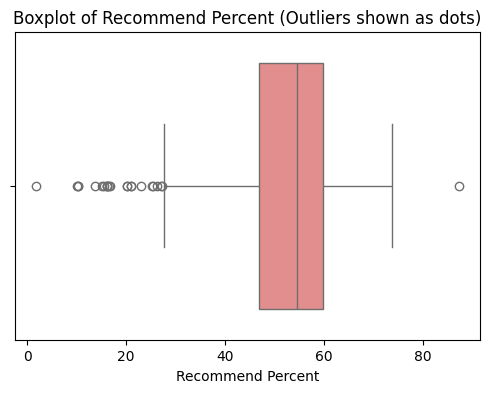

In [74]:
plt.figure(figsize=(6,4))
sns.boxplot(x=copyData['RecommendPercent'], color="lightcoral")
plt.title("Boxplot of Recommend Percent (Outliers shown as dots)")
plt.xlabel("Recommend Percent")
plt.show()

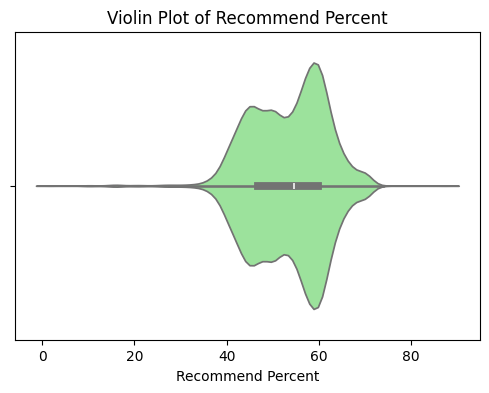

In [75]:
plt.figure(figsize=(6,4))
sns.violinplot(x=copyData['RecommendPercent'], color="lightgreen")
plt.title("Violin Plot of Recommend Percent")
plt.xlabel("Recommend Percent")
plt.show()

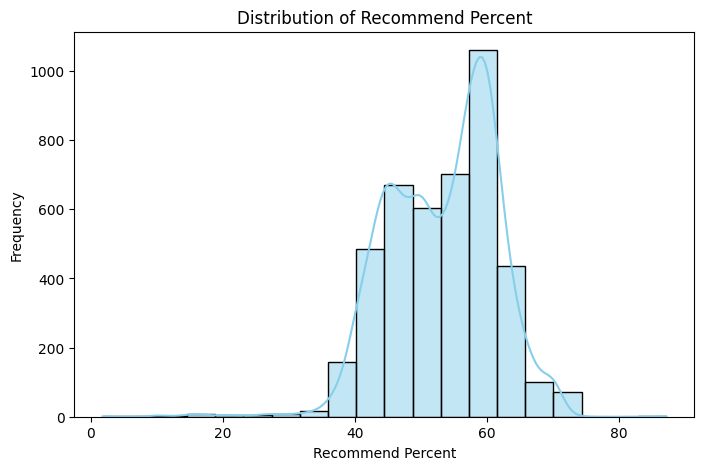

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(copyData['RecommendPercent'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Recommend Percent")
plt.xlabel("Recommend Percent")
plt.ylabel("Frequency")
plt.show()

In [77]:
# Calculate Q1, Q3 and IQR
Q1 = copyData['RecommendPercent'].quantile(0.25)
Q3 = copyData['RecommendPercent'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create mask for outliers
outlier_mask = (copyData['RecommendPercent'] <= lower_bound) | (copyData['RecommendPercent'] >= upper_bound)

# Count outliers
num_outliers = outlier_mask.sum()
print("Number of outliers:", num_outliers)


Number of outliers: 23


In [78]:
df_no_outliers = copyData[
    (copyData['RecommendPercent'] > lower_bound) & 
    (copyData['RecommendPercent'] < upper_bound)
]

In [79]:
df_no_outliers

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper,SpendNorm,PremiumRatioNorm,RecommendScore,RecommendPercent
1,12347.0,2.64,47.25,16526.01,0.0,0.000000,Iceland,1.0,2.00,174250.28,1,0,0,0.019318,0.4725,0.600295,60.029538
2,12348.0,5.76,12.90,8235.53,0.0,0.000000,Finland,1.0,9.40,814328.00,1,0,0,0.012089,0.1290,0.529427,52.942685
3,12349.0,8.29,54.79,2975.81,0.0,0.000000,Italy,0.0,999.00,0.00,1,1,0,0.007504,0.5479,0.511831,51.183107
4,12350.0,3.84,35.29,642.40,0.0,0.000000,Norway,0.0,999.00,0.00,1,1,0,0.005469,0.3529,0.472221,47.222072
5,12352.0,23.27,65.26,1101.59,18.0,0.211765,Norway,1.0,2.74,239057.87,0,0,0,0.005869,0.6526,0.429340,42.933965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1,1,0,0.005025,1.0000,0.601508,60.150758
4368,18281.0,5.62,42.86,357.10,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1,1,0,0.005220,0.4286,0.487286,48.728609
4369,18282.0,4.82,69.23,153.76,0.0,0.000000,United Kingdom,1.0,9.83,856240.00,1,0,0,0.005043,0.6923,0.639973,63.997291
4370,18283.0,1.61,14.95,4704.99,0.0,0.000000,United Kingdom,1.0,0.43,38211.50,1,0,0,0.009011,0.1495,0.532603,53.260337


In [80]:
print("Original size:", copyData.shape[0])
print("After removing outliers:", df_no_outliers.shape[0])

Original size: 4372
After removing outliers: 4316


In [81]:
print(copyData.isna().sum())

CustomerID                0
avg_item_value            0
premium_item_ratio_x      0
TotalSpent_x             33
TotalReturns_x           33
ReturnRate_x             33
Country_x                33
HighEngagement            0
avg_date_diff_days       79
avg_time_diff_seconds    79
no_returns                0
new_customer              0
value_shopper             0
SpendNorm                33
PremiumRatioNorm          0
RecommendScore           33
RecommendPercent         33
dtype: int64


In [82]:
# i forgot to check nan values. foolish me

In [83]:
df_no_outliers.loc[:, 'RecommendPercentWhole'] = df_no_outliers['RecommendPercent'].round(0).astype(int)

C:\Users\MSI\AppData\Local\Temp\ipykernel_4616\3362810068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'RecommendPercentWhole'] = df_no_outliers['RecommendPercent'].round(0).astype(int)


In [85]:
df_no_outliers = df_no_outliers.copy()
df_no_outliers['RecommendPercentWhole'] = df_no_outliers['RecommendPercent'].round(0).astype(int)
# this way is safe

In [86]:
df_no_outliers

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper,SpendNorm,PremiumRatioNorm,RecommendScore,RecommendPercent,RecommendPercentWhole
1,12347.0,2.64,47.25,16526.01,0.0,0.000000,Iceland,1.0,2.00,174250.28,1,0,0,0.019318,0.4725,0.600295,60.029538,60
2,12348.0,5.76,12.90,8235.53,0.0,0.000000,Finland,1.0,9.40,814328.00,1,0,0,0.012089,0.1290,0.529427,52.942685,53
3,12349.0,8.29,54.79,2975.81,0.0,0.000000,Italy,0.0,999.00,0.00,1,1,0,0.007504,0.5479,0.511831,51.183107,51
4,12350.0,3.84,35.29,642.40,0.0,0.000000,Norway,0.0,999.00,0.00,1,1,0,0.005469,0.3529,0.472221,47.222072,47
5,12352.0,23.27,65.26,1101.59,18.0,0.211765,Norway,1.0,2.74,239057.87,0,0,0,0.005869,0.6526,0.429340,42.933965,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1,1,0,0.005025,1.0000,0.601508,60.150758,60
4368,18281.0,5.62,42.86,357.10,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1,1,0,0.005220,0.4286,0.487286,48.728609,49
4369,18282.0,4.82,69.23,153.76,0.0,0.000000,United Kingdom,1.0,9.83,856240.00,1,0,0,0.005043,0.6923,0.639973,63.997291,64
4370,18283.0,1.61,14.95,4704.99,0.0,0.000000,United Kingdom,1.0,0.43,38211.50,1,0,0,0.009011,0.1495,0.532603,53.260337,53


In [87]:
print(df_no_outliers.isna().sum())

CustomerID                0
avg_item_value            0
premium_item_ratio_x      0
TotalSpent_x              0
TotalReturns_x            0
ReturnRate_x              0
Country_x                 0
HighEngagement            0
avg_date_diff_days       61
avg_time_diff_seconds    61
no_returns                0
new_customer              0
value_shopper             0
SpendNorm                 0
PremiumRatioNorm          0
RecommendScore            0
RecommendPercent          0
RecommendPercentWhole     0
dtype: int64


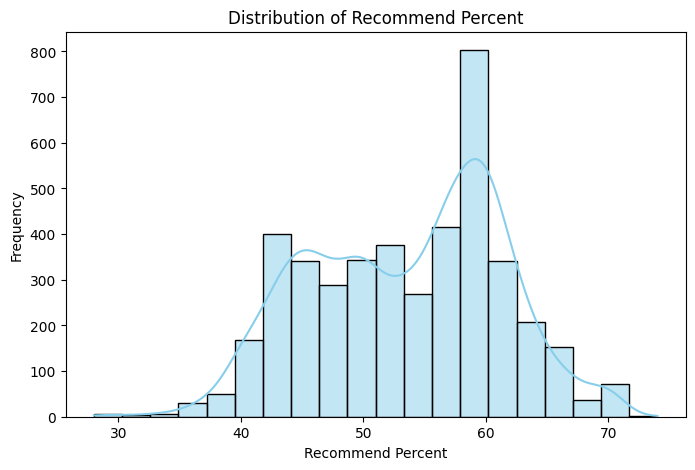

In [88]:
plt.figure(figsize=(8,5))
sns.histplot(df_no_outliers['RecommendPercentWhole'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Recommend Percent")
plt.xlabel("Recommend Percent")
plt.ylabel("Frequency")
plt.show()

In [89]:
print(f"Min Score: {df_no_outliers['RecommendPercentWhole'].min():.2f}")
print(f"Max Score: {df_no_outliers['RecommendPercentWhole'].max():.2f}")

Min Score: 28.00
Max Score: 74.00


In [90]:
(df_no_outliers['RecommendPercentWhole'] >= 55).sum()

np.int64(2170)

In [91]:
(df_no_outliers['RecommendPercentWhole'] < 55).sum()

np.int64(2146)

In [92]:
# i'm feeling removing out liers is the foolish thing i did...
# i had to change the final architechture i mean i was originally planning to make a multiple classes for predict behavior of recomming.
# but this result force me to just keep it two (regular and risk customers)
# smote like techiniques even i can apply when this point i was so tired of this dataset 😒😑

In [93]:
(df_no_outliers['RecommendPercentWhole'] > 60).sum()

np.int64(810)

In [95]:
# Create y column based on threshold
df_no_outliers.loc[:, 'y'] = (df_no_outliers['RecommendPercent'] >= 55).astype(int)

# Optional: add a type column for readability
df_no_outliers.loc[:, 'Type'] = df_no_outliers['y'].map({1: 'Regular', 0: 'At-risk'})

# Check
df_no_outliers[['RecommendPercent', 'Type', 'y']].head(10)


,RecommendPercent,Type,y
1,60.029538,Regular,1.0
2,52.942685,At-risk,0.0
3,51.183107,At-risk,0.0
4,47.222072,At-risk,0.0
5,42.933965,At-risk,0.0
6,55.147269,Regular,1.0
7,51.220050,At-risk,0.0
8,54.001740,At-risk,0.0
9,57.411517,Regular,1.0
10,50.840637,At-risk,0.0


In [96]:
df_no_outliers

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper,SpendNorm,PremiumRatioNorm,RecommendScore,RecommendPercent,RecommendPercentWhole,y,Type
1,12347.0,2.64,47.25,16526.01,0.0,0.000000,Iceland,1.0,2.00,174250.28,1.0,0.0,0.0,0.019318,0.4725,0.600295,60.029538,60.0,1.0,Regular
2,12348.0,5.76,12.90,8235.53,0.0,0.000000,Finland,1.0,9.40,814328.00,1.0,0.0,0.0,0.012089,0.1290,0.529427,52.942685,53.0,0.0,At-risk
3,12349.0,8.29,54.79,2975.81,0.0,0.000000,Italy,0.0,999.00,0.00,1.0,1.0,0.0,0.007504,0.5479,0.511831,51.183107,51.0,0.0,At-risk
4,12350.0,3.84,35.29,642.40,0.0,0.000000,Norway,0.0,999.00,0.00,1.0,1.0,0.0,0.005469,0.3529,0.472221,47.222072,47.0,0.0,At-risk
5,12352.0,23.27,65.26,1101.59,18.0,0.211765,Norway,1.0,2.74,239057.87,0.0,0.0,0.0,0.005869,0.6526,0.429340,42.933965,43.0,0.0,At-risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,18281.0,5.62,42.86,357.10,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1.0,1.0,0.0,0.005220,0.4286,0.487286,48.728609,49.0,0.0,At-risk
4369,18282.0,4.82,69.23,153.76,0.0,0.000000,United Kingdom,1.0,9.83,856240.00,1.0,0.0,0.0,0.005043,0.6923,0.639973,63.997291,64.0,1.0,Regular
4370,18283.0,1.61,14.95,4704.99,0.0,0.000000,United Kingdom,1.0,0.43,38211.50,1.0,0.0,0.0,0.009011,0.1495,0.532603,53.260337,53.0,0.0,At-risk
4371,18287.0,1.49,24.29,5072.72,0.0,0.000000,United Kingdom,1.0,2.28,199034.78,1.0,0.0,0.0,0.009332,0.2429,0.551380,55.137955,55.0,1.0,Regular


In [97]:
# Find rows where all values are NaN
all_nan_rows = df_no_outliers[df_no_outliers.isna().all(axis=1)]
print(all_nan_rows)

Empty DataFrame
Columns: [CustomerID, avg_item_value, premium_item_ratio_x, TotalSpent_x, TotalReturns_x, ReturnRate_x, Country_x, HighEngagement, avg_date_diff_days, avg_time_diff_seconds, no_returns, new_customer, value_shopper, SpendNorm, PremiumRatioNorm, RecommendScore, RecommendPercent, RecommendPercentWhole, y, Type]
Index: []


In [98]:
# Remove rows where all columns are NaN
df_no_outliers = df_no_outliers[~df_no_outliers.isna().all(axis=1)]
# ~ mark is super important

In [99]:
df_no_outliers

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper,SpendNorm,PremiumRatioNorm,RecommendScore,RecommendPercent,RecommendPercentWhole,y,Type
1,12347.0,2.64,47.25,16526.01,0.0,0.000000,Iceland,1.0,2.00,174250.28,1.0,0.0,0.0,0.019318,0.4725,0.600295,60.029538,60.0,1.0,Regular
2,12348.0,5.76,12.90,8235.53,0.0,0.000000,Finland,1.0,9.40,814328.00,1.0,0.0,0.0,0.012089,0.1290,0.529427,52.942685,53.0,0.0,At-risk
3,12349.0,8.29,54.79,2975.81,0.0,0.000000,Italy,0.0,999.00,0.00,1.0,1.0,0.0,0.007504,0.5479,0.511831,51.183107,51.0,0.0,At-risk
4,12350.0,3.84,35.29,642.40,0.0,0.000000,Norway,0.0,999.00,0.00,1.0,1.0,0.0,0.005469,0.3529,0.472221,47.222072,47.0,0.0,At-risk
5,12352.0,23.27,65.26,1101.59,18.0,0.211765,Norway,1.0,2.74,239057.87,0.0,0.0,0.0,0.005869,0.6526,0.429340,42.933965,43.0,0.0,At-risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,18281.0,5.62,42.86,357.10,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1.0,1.0,0.0,0.005220,0.4286,0.487286,48.728609,49.0,0.0,At-risk
4369,18282.0,4.82,69.23,153.76,0.0,0.000000,United Kingdom,1.0,9.83,856240.00,1.0,0.0,0.0,0.005043,0.6923,0.639973,63.997291,64.0,1.0,Regular
4370,18283.0,1.61,14.95,4704.99,0.0,0.000000,United Kingdom,1.0,0.43,38211.50,1.0,0.0,0.0,0.009011,0.1495,0.532603,53.260337,53.0,0.0,At-risk
4371,18287.0,1.49,24.29,5072.72,0.0,0.000000,United Kingdom,1.0,2.28,199034.78,1.0,0.0,0.0,0.009332,0.2429,0.551380,55.137955,55.0,1.0,Regular


In [103]:
new = df_no_outliers.copy()
# Drop the last row by index
new = new.iloc[:-1]

# Confirm removal
print(new.tail())


      CustomerID  avg_item_value  premium_item_ratio_x  TotalSpent_x  \
4367     18280.0            4.76                100.00        133.41   
4368     18281.0            5.62                 42.86        357.10   
4369     18282.0            4.82                 69.23        153.76   
4370     18283.0            1.61                 14.95       4704.99   
4371     18287.0            1.49                 24.29       5072.72   

      TotalReturns_x  ReturnRate_x       Country_x  HighEngagement  \
4367             0.0           0.0  United Kingdom             0.0   
4368             0.0           0.0  United Kingdom             0.0   
4369             0.0           0.0  United Kingdom             1.0   
4370             0.0           0.0  United Kingdom             1.0   
4371             0.0           0.0  United Kingdom             1.0   

      avg_date_diff_days  avg_time_diff_seconds  no_returns  new_customer  \
4367              999.00                   0.00         1.0          

In [104]:
new

,CustomerID,avg_item_value,premium_item_ratio_x,TotalSpent_x,TotalReturns_x,ReturnRate_x,Country_x,HighEngagement,avg_date_diff_days,avg_time_diff_seconds,no_returns,new_customer,value_shopper,SpendNorm,PremiumRatioNorm,RecommendScore,RecommendPercent,RecommendPercentWhole,y,Type
1,12347.0,2.64,47.25,16526.01,0.0,0.000000,Iceland,1.0,2.00,174250.28,1.0,0.0,0.0,0.019318,0.4725,0.600295,60.029538,60.0,1.0,Regular
2,12348.0,5.76,12.90,8235.53,0.0,0.000000,Finland,1.0,9.40,814328.00,1.0,0.0,0.0,0.012089,0.1290,0.529427,52.942685,53.0,0.0,At-risk
3,12349.0,8.29,54.79,2975.81,0.0,0.000000,Italy,0.0,999.00,0.00,1.0,1.0,0.0,0.007504,0.5479,0.511831,51.183107,51.0,0.0,At-risk
4,12350.0,3.84,35.29,642.40,0.0,0.000000,Norway,0.0,999.00,0.00,1.0,1.0,0.0,0.005469,0.3529,0.472221,47.222072,47.0,0.0,At-risk
5,12352.0,23.27,65.26,1101.59,18.0,0.211765,Norway,1.0,2.74,239057.87,0.0,0.0,0.0,0.005869,0.6526,0.429340,42.933965,43.0,0.0,At-risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,4.76,100.00,133.41,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1.0,1.0,0.0,0.005025,1.0000,0.601508,60.150758,60.0,1.0,Regular
4368,18281.0,5.62,42.86,357.10,0.0,0.000000,United Kingdom,0.0,999.00,0.00,1.0,1.0,0.0,0.005220,0.4286,0.487286,48.728609,49.0,0.0,At-risk
4369,18282.0,4.82,69.23,153.76,0.0,0.000000,United Kingdom,1.0,9.83,856240.00,1.0,0.0,0.0,0.005043,0.6923,0.639973,63.997291,64.0,1.0,Regular
4370,18283.0,1.61,14.95,4704.99,0.0,0.000000,United Kingdom,1.0,0.43,38211.50,1.0,0.0,0.0,0.009011,0.1495,0.532603,53.260337,53.0,0.0,At-risk
